# The Birthday Puzzle Paradox

If a room contains N people, what is the probability that at least 2 people will share the same birthday? 

- https://en.wikipedia.org/wiki/Birthday_problem
- https://en.wikipedia.org/wiki/Birthday_problem



# Solution Assuming Uniform Distribution of Birthdays
- Assume all birthdays are equally likely (ie a uniform distribution from 1 to 365). We can sample from this distribution in python using *numpy.random.randint*.
- For a given number of people in the room (*N_in_room*), draw a random sample of size *N_in_room* with replacement and check if any values occur more than once (i'll use the handy *Counter* function from the *collections* module to count the number of times each value occurs).
- Repeat this sampling process many times, then calculate the percent of times we get at least one duplicate; this is interpreted as the probability of getting at least one match for that room size.
- Repeat the above process for different *N_in_room* values, and plot the probabilities versus *N_in_room*.

In [1]:
# %load ~/jupyter_imports
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import seaborn as sns

# make plots look nice
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['lines.linewidth'] = 3
plt.style.use('ggplot')


In [2]:
def prob_shared_birthday(N_in_room, N_simulations=5000, probs=None):
    '''
    Simulate the 'Birthday Puzzle Paradox'
    
    INPUT
    N_in_room (integer) : Number of People in room
    N_simulations (integer)(optional) : Number of Simulations to run (default = 5000)
    probs (numpy array)(optional): Array of probabilities for each yday (1-365). 
        Defaults to 'None' (uniform probability distribution)
    
    RETURNS
    (p_gte2, p_gte3) (tuple of floats) : Probabilites of >=2, >=3 people sharing birthdays
    '''
    n_gte2 = []
    n_gte3  = []
    possible_ydays = np.arange(1,366)
    for _ in range(N_simulations):
        x = np.random.choice(possible_ydays, size = N_in_room,  replace=True, p=probs)
        vals = np.array(list(Counter(x).values()))
        n_gte2.append(np.sum(vals>=2))
        n_gte3.append(np.sum(vals>=3))
    p_gte2 = np.mean(np.array(n_gte2)>0)
    p_gte3 = np.mean(np.array(n_gte3)>0)
    return (p_gte2, p_gte3)

In [3]:
prob_shared_birthday(23,10000)

(0.509, 0.0123)

In [4]:

p=[]
for N_in_room in range(1,70):
    p_gte2, p_gte3 = prob_shared_birthday(N_in_room)
    p.append(p_gte2)
    

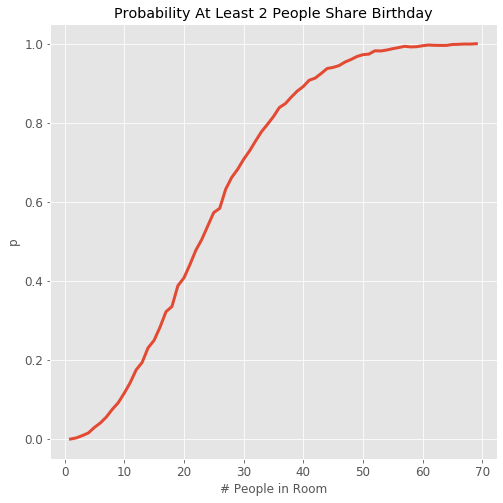

In [5]:
fig, ax = plt.subplots(1, figsize=(8,8))
ax.plot(list(range(1,70)), p, linewidth=3)
ax.set_xlabel('# People in Room')
ax.set_ylabel('p')
ax.set_title('Probability At Least 2 People Share Birthday')
plt.show()

In [6]:
prob_shared_birthday(87)

(1.0, 0.5098)

How many simulations does it take for probability to converge? We'll check for the 23 person room.

(0, 1)

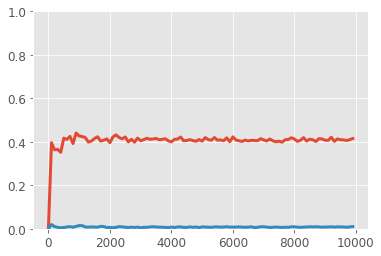

In [7]:
p=[]
N_in_room = 20
Nsims = list(range(1,10000, 100))
for N_simulations in Nsims:
    p.append(prob_shared_birthday(N_in_room,N_simulations))

fig,ax = plt.subplots(1)
ax.plot(Nsims,p)
ax.set_ylim(0,1)

# Solution Using Actual Probabilities of Birth Days

Above we assumed that all birthdays were equally likely; but this is not the case in real life.
- http://thedailyviz.com/2016/09/17/how-common-is-your-birthday-dailyviz/
- http://www.vizwiz.com/2012/05/how-common-is-your-birthday-find-out.html
- https://github.com/fivethirtyeight/data/tree/master/births



In [8]:
df_births = pd.read_csv('../data/US_births_2000-2014_SSA.csv')
df_births.drop(['day_of_week'], axis=1, inplace=True)
df_births.head()

,year,month,date_of_month,births
0,2000,1,1,9083
1,2000,1,2,8006
2,2000,1,3,11363
3,2000,1,4,13032
4,2000,1,5,12558


In [9]:
df_births.rename( columns={'date_of_month':'day'},inplace=True)
df_births['date'] = pd.to_datetime(df_births[['year', 'month', 'day']])
df_births['leap_year']=df_births['date'].dt.is_leap_year
df_births['yearday'] = df_births['date'].dt.dayofyear
df_births.head()

,year,month,day,births,date,leap_year,yearday
0,2000,1,1,9083,2000-01-01,True,1
1,2000,1,2,8006,2000-01-02,True,2
2,2000,1,3,11363,2000-01-03,True,3
3,2000,1,4,13032,2000-01-04,True,4
4,2000,1,5,12558,2000-01-05,True,5


In [10]:
# drop leap years
df_births = df_births[df_births['leap_year']==False]
#df_births['year'].value_counts()
df_births.drop('leap_year', axis=1, inplace=True)
df_births.head()

,year,month,day,births,date,yearday
366,2001,1,1,7663,2001-01-01,1
367,2001,1,2,10635,2001-01-02,2
368,2001,1,3,12449,2001-01-03,3
369,2001,1,4,12678,2001-01-04,4
370,2001,1,5,12647,2001-01-05,5


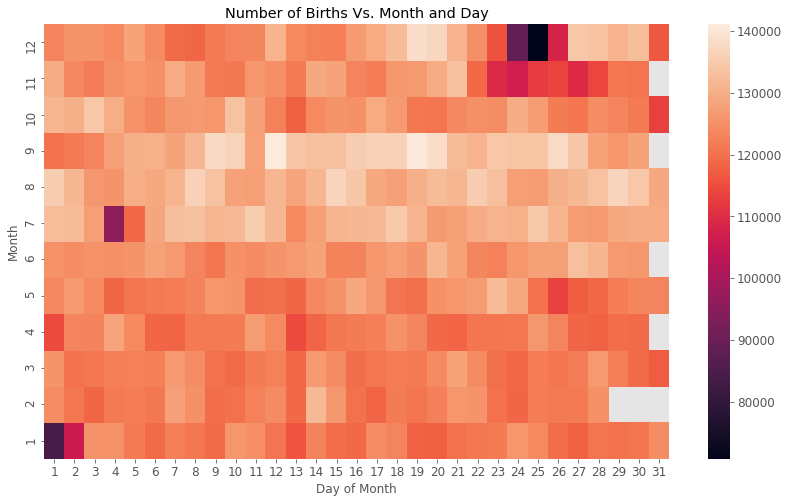

In [11]:
df2 = df_births.groupby(['month','day']).sum().reset_index()
fig,ax = plt.subplots(1, figsize=(14,8))
sns.heatmap(df2.pivot('month','day','births'), ax=ax)
ax.invert_yaxis()
ax.set_xlabel('Day of Month')
ax.set_ylabel('Month')
ax.set_title('Number of Births Vs. Month and Day')
plt.show()

In [12]:
df_births.drop(['year', 'month','day'], axis=1, inplace=True)
df_gb_yday = df_births.groupby('yearday').sum().reset_index()
total_births = df_births['births'].sum()
df_gb_yday['birth_prob'] = df_gb_yday['births']/total_births
df_gb_yday.head()

,yearday,births,birth_prob
0,1,84099,0.001847
1,2,105941,0.002326
2,3,125400,0.002754
3,4,125398,0.002754
4,5,121351,0.002665


Check that probabilities sum to 1:

In [13]:
np.sum(df_gb_yday['birth_prob'])

1.0

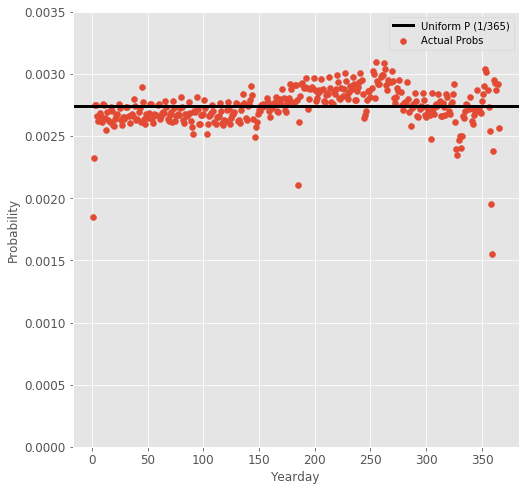

In [14]:
fig, ax = plt.subplots(1, figsize=(8,8))
ax.scatter(df_gb_yday['yearday'], df_gb_yday['birth_prob'], label='Actual Probs')
ax.set_ylim(0,0.0035)
ax.axhline(1/365, color='black', label='Uniform P (1/365)')
ax.set_xlabel('Yearday')
ax.set_ylabel('Probability')
ax.legend()
plt.show()

In [19]:
print(prob_shared_birthday(23,10000,  probs = None))
print(prob_shared_birthday(23,10000,  probs = df_gb_yday['birth_prob'].values))

(0.4983, 0.0126)
(0.5104, 0.0157)


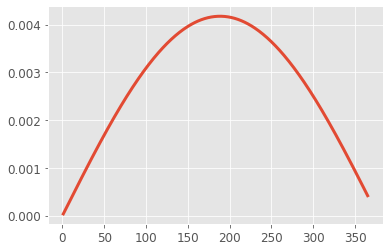

In [16]:
ydays = np.arange(1,366)
test_probs = np.sin(ydays/120)
test_probs = test_probs/np.sum(test_probs)
plt.plot(ydays,test_probs)
#np.sum(test_probs)

In [17]:
p1=[]
for N_in_room in range(1,60):
    p1.append(prob_shared_birthday(N_in_room, 10000))

p2=[]
for N_in_room in range(1,60):
    p2.append(prob_shared_birthday(N_in_room, 10000, probs = test_probs))
#    p2.append(prob_shared_birthday(N_in_room, 30000, probs = df_gb_yday['birth_prob'].values))


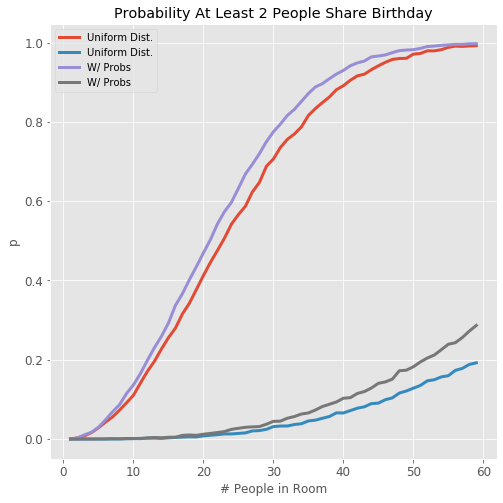

In [18]:
fig, ax = plt.subplots(1, figsize=(8,8))
ax.plot(list(range(1,60)), p1, linewidth=3, label='Uniform Dist.')
ax.plot(list(range(1,60)), p2, linewidth=3, label='W/ Probs')
ax.set_xlabel('# People in Room')
ax.set_ylabel('p')
ax.legend()
ax.set_title('Probability At Least 2 People Share Birthday')
plt.show()